## Code along - CNN 

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from tensorflow.keras.datasets.cifar10 import  load_data

help(load_data)

Help on function load_data in module keras.src.datasets.cifar10:

load_data()
    Loads the CIFAR10 dataset.
    
    This is a dataset of 50,000 32x32 color training images and 10,000 test
    images, labeled over 10 categories. See more info at the
    [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).
    
    The classes are:
    
    | Label | Description |
    |:-----:|-------------|
    |   0   | airplane    |
    |   1   | automobile  |
    |   2   | bird        |
    |   3   | cat         |
    |   4   | deer        |
    |   5   | dog         |
    |   6   | frog        |
    |   7   | horse       |
    |   8   | ship        |
    |   9   | truck       |
    
    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(50000, 32, 32, 3)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **`y_train`**: `uint8` NumPy array of l

In [4]:
(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 45s 0us/step


In [11]:
# 50000 - images, 32x32 for each image with 3 color channels (RGB)
x_train.shape


(50000, 32, 32, 3)

In [15]:
# ravel to remove the extra dimension from the y 
y_train, y_test = y_train.ravel(), y_test.ravel()

In [16]:
y_train.shape

(50000,)

In [23]:
labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

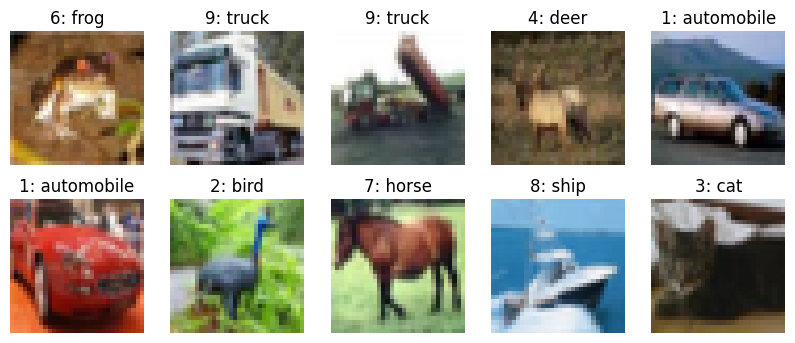

In [24]:
fig, axes = plt.subplots(2,5, figsize=(10,4))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}: {labels[y_train[i]]}")

In [30]:
x_train[1].flatten().min(), x_train[1].flatten().max()

(5, 254)

In [36]:
scaled_X_train = x_train.astype("float32") / 255
scaled_X_test = x_test.astype("float32") / 255

scaled_X_train.flatten().min(), scaled_X_test.flatten().max()

(0.0, 1.0)

## CNN model 

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam

def cnn_model(learning_rate = .001, dropout_rate = .5, kernels = [32, 64]):
    # optimizer which is used for learning 
    adam = Adam(learning_rate=learning_rate)
    model = Sequential(name=("CNN_model"))

    for kernel in kernels:
        conv_layer = Conv2D(
            kernel, # kernels in each layers 
            kernel_size=(3,3), # filter sizes can also (5,5) / (7,7)
            activation = "relu", # good starting point
            kernel_initializer = "he_normal", # initializing weight, good to use relu
            input_shape = x_train.shape[1:] # 32 x 32 x 3 
        )

        model.add(conv_layer)
        model.add(MaxPooling2D(pool_size=(2, 2), strides=2))



    # MLP part
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(256, activation = "relu", kernel_initializer ="he_normal"))
    model.add(Dense(10, activation="softmax")) # softmax -> porbabilities for each outputs 
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer = adam, metrics=["acc"])

    return model 

model = cnn_model(kernels=[32,64,32])
model.summary()

Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,450 (286.91 KB)

 Trainable params: 73,450 (286.91 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=15)

model.fit(scaled_X_train, y_train, epochs=100, callbacks=[early_stopper], validation_split=1/5)

Epoch 1/100


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - acc: 0.2099 - loss: 2.0988 - val_acc: 0.4632 - val_loss: 1.4726
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - acc: 0.4295 - loss: 1.5354 - val_acc: 0.5478 - val_loss: 1.2644
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - acc: 0.5048 - loss: 1.3653 - val_acc: 0.5799 - val_loss: 1.1787
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - acc: 0.5384 - loss: 1.2747 - val_acc: 0.6042 - val_loss: 1.1059
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - acc: 0.5681 - loss: 1.2056 - val_acc: 0.6149 - val_loss: 1.0776
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - acc: 0.5859 - loss: 1.1587 - val_acc: 0.6365 - val_loss: 1.0600
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - acc: 0.5956 - loss: 1.1282 - val_acc: 0.6346 - val_loss: 1.0365
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - acc: 0.6156 - loss: 1.0867 - val_acc: 0.6404 - val_loss: 1.0261
Epoch 9/100
1250/1250 ━━━━━━

In [50]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,acc,loss,val_acc,val_loss
0,0.285425,1.888474,0.4632,1.472640
1,0.448775,1.495553,0.5478,1.264403
2,0.512275,1.348125,0.5799,1.178720
3,0.543875,1.263665,0.6042,1.105950
4,0.566575,1.209719,0.6149,1.077597


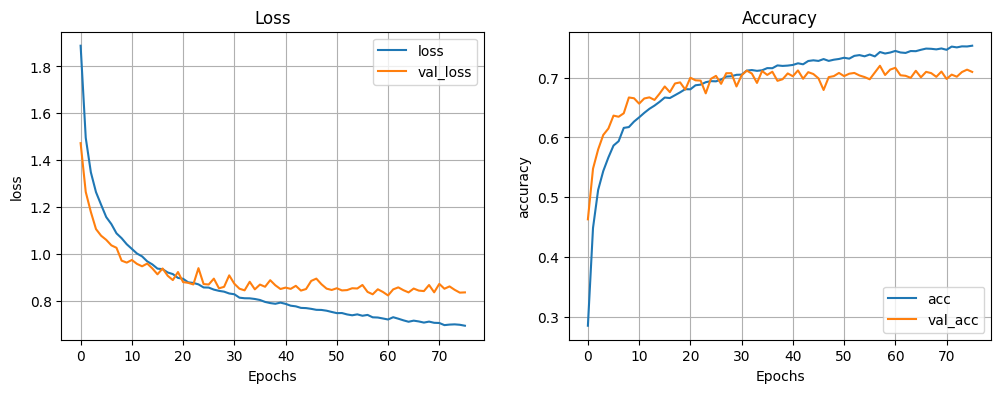

In [54]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel="Epochs", ylabel="loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel="Epochs", ylabel="accuracy")

plot_metrics(metrics)

## Hyperparameter tuning 
- dropout rate
- learning rate
- diffrent network configurations
- which type of pooling layer
- diffrent optimizers 
- ...

we pick dropout to tune 

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=3, restore_best_weights=True) 

def evalute_model(**kwargs):
    model=cnn_model(**kwargs) # gets the parameters of cnn_model in the code above

    model.fit(scaled_X_train, y_train, epochs=10, callbacks=[early_stopper], validation_split=1/5) # fewer epochs

    metrics = pd.DataFrame(model.history.history)
    # gets last epochs validation accuracy 
    val_acc = metrics["val_acc"].iloc[-1]
    return val_acc



In [62]:
dropout_accuracies = {}

for dropout_rate in np.arange(.1,.6,.1):
    dropout_rate = np.round(dropout_rate,1)
    dropout_accuracies[dropout_rate] = evalute_model(dropout_rate = dropout_rate)


c:\Users\Noah7\code\Github\AI-Noah-Eliasson-OPA23\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - acc: 0.4103 - loss: 1.6439 - val_acc: 0.5902 - val_loss: 1.1522
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - acc: 0.6261 - loss: 1.0664 - val_acc: 0.6385 - val_loss: 1.0254
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - acc: 0.6974 - loss: 0.8733 - val_acc: 0.6759 - val_loss: 0.9334
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - acc: 0.7473 - loss: 0.7201 - val_acc: 0.6932 - val_loss: 0.9006
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - acc: 0.7897 - loss: 0.6018 - val_acc: 0.6958 - val_loss: 0.9324
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - acc: 0.8329 - loss: 0.4791 - val_acc: 0.7058 - val_loss: 0.9116
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - acc: 0.8681 - loss: 0.3869 - val_acc: 0.7029 - val_loss: 0.9912
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - acc: 0.3883 - loss: 1.6851 - val_acc: 0.5728 - val_loss: 1.2154
Epoch 2/10
1250/1250 ━━━